In [1]:
import warnings
warnings.filterwarnings('ignore')

from dualneuron.twins.nets import V4ColorTaskDriven, V1GrayTaskDriven
from dualneuron.synthesis.ascend import fourier_ascending, pixel_ascending
from dualneuron.synthesis.visualize import blend, plot_group, plot_poles

import matplotlib.pyplot as plt
import torch
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
function = V4ColorTaskDriven(centered=True, ensemble=False).eval().to(device)

In [42]:
images = []
alphas = []
acts = []

neuron = 4
lr = 1.0
nb_crops = 6
norm = 40.0

for weight in [-1, 1]:
    image, alpha, act = fourier_ascending(
        lambda images: weight * torch.mean(function(images)[:, neuron]),
        magnitude_path='natural_rgb.npy',
        total_steps=128,
        learning_rate=lr,
        lr_schedule=True,
        noise=0.05,
        values_range=(-2.0, 2.0),
        range_fn='sigmoid',
        nb_crops=nb_crops,
        box_size=(1.0, 1.0),
        target_norm=norm,
        tv_weight=0.0001,
        jitter_std=0.05,
        oversample=1, 
        reflect_pad_frac=0.05,
        device='cuda',
        verbose=True
    )

    images.append(image)
    alphas.append(alpha)
    acts.append(act)

Activation: 5.4085: 100%|██████████| 128/128 [00:03<00:00, 40.28it/s]


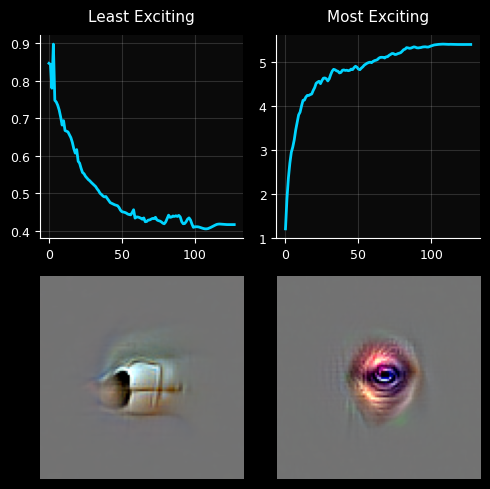

In [43]:
poles = []
for image, alpha in zip(images, alphas):
    pole = blend(image, alpha, imagecut=0.0, alphacut=95.0, boost=1.5)
    poles.append(pole)

plot_poles(poles, acts)

In [44]:
function = V1GrayTaskDriven(centered=True, ensemble=False).eval().to(device)

In [45]:
images = []
alphas = []
acts = []

neuron = 0
lr = 1.
nb_crops = 4
norm = 12.0

for weight in [-1, 1]:
    image, alpha, act = pixel_ascending(
        lambda images: weight * torch.mean(function(images)[:, neuron]),
        image_size=93,
        channels=1,
        total_steps=128,
        learning_rate=lr,
        lr_schedule=True,
        noise=0.05,
        values_range=(-1, 1),
        nb_crops=nb_crops,
        box_size=(1.0, 1.0),
        target_norm=norm,
        tv_weight=1e-4,
        init_std=0.05,
        jitter_std=0.05,
        oversample=1, 
        reflect_pad_frac=0.05,
        device='cuda',
        verbose=True
    )

    images.append(image)
    alphas.append(alpha)
    acts.append(act)

Activation: 3.0099: 100%|██████████| 128/128 [00:02<00:00, 60.93it/s]


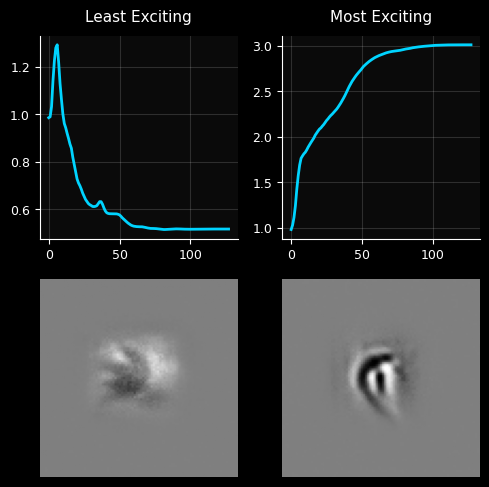

In [46]:
poles = []
for image, alpha in zip(images, alphas):
    pole = blend(image, alpha, imagecut=0.0, alphacut=95.0, boost=1.5)
    poles.append(pole)

plot_poles(poles, acts, vmin=0.1, vmax=0.8)